In [2]:
import pandas as pd

with open('col_10k.txt', 'r', encoding='utf-8') as file:
    data=file.readlines()
data[:2]
col_nums=list(map(lambda line : line[:-3].split(","),data))
col_nums=list(map(lambda line : list(map(lambda x : int(x), line)),col_nums))
col_nums[:2]

[[2, 1], [3, 10, 5, 16, 8, 4, 2, 1]]

In [3]:
col_nums=col_nums[:1000]

In [6]:
from math import sin,cos,pi
def nums_to_point(num):
    x_points=[0]
    y_points=[0]
    z_points=[0]
    dir=pi
    for index,n in enumerate(num,1):
        if n%2==0:
            dir+=pi/18
            x_points.append(x_points[index-1]+sin(dir))
            y_points.append(y_points[index-1]+cos(dir))
        else:
            dir
            x_points.append(x_points[index-1]+sin(dir))
            y_points.append(y_points[index-1]+cos(dir))
        z_points.append(z_points[index-1]+0.5)
    return x_points,y_points,z_points
points=[]
for line in col_nums:
    points.append(nums_to_point(line))

<Figure size 640x480 with 0 Axes>

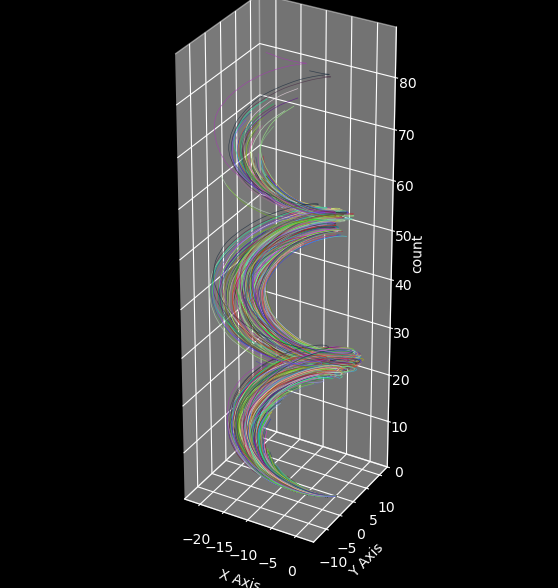

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
plt.style.use("dark_background")
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection="3d")
all_x = [x for point in points for x in point[0]]
all_y = [y for point in points for y in point[1]]
all_z = [z for point in points for z in point[2]]
xlim = (min(all_x), max(all_x))
ylim = (min(all_y), max(all_y))
zlim = (min(all_z), max(all_z))
ax.set_xlim(xlim)   # X축 범위
ax.set_ylim(ylim)   # Y축 범위
ax.set_zlim(zlim) #Z
xlim = ax.get_xlim3d()
ylim = ax.get_ylim3d()
zlim = ax.get_zlim3d()
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("count")
ax.set_box_aspect([xlim[1]-xlim[0], ylim[1]-ylim[0], zlim[1]-zlim[0]])
for num in points:
    #color=cm.cividis(np.random.rand())
    color=np.random.rand(4,)
    ax.plot(num[0],num[1],num[2],color=color,alpha=0.7,lw=0.5)
filename="3d_colors"
plt.savefig("graph/"+filename+".svg")
plt.savefig("graph/"+filename+".png")
plt.show()